In [25]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
region = "laguna"
year = "2016"
category = "MedInd"

In [27]:
df = pd.read_csv("Generated/" + region + " " + year + ".csv")
use = df[category].as_matrix()
full = df["Full"].as_matrix()
ofull = list(full)

def disp(ran = 2400):
    plt.legend(["Orginal Full","New Full"])
    plt.plot(ofull[0:ran])
    #plt.plot(use[0:ran])
    plt.plot(full[0:ran])

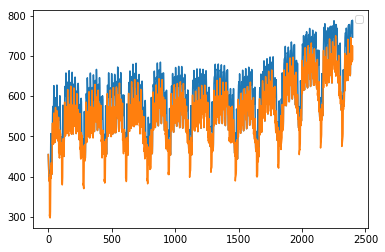

In [28]:
#Policy 1: Efficiency Improvment
startH = 10
endH = 24
eff = 0.4

for i in range(0,len(use)):
    h = i%24
    if(h >= startH and h <= endH):
        temp = (use[i] * eff)
        use[i] -= temp
        full[i] -= temp

disp()

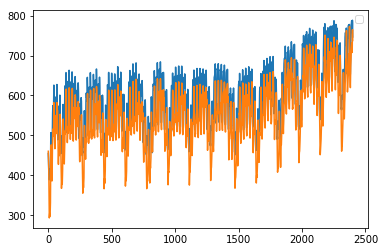

In [29]:
#Policy 2: Simplistic Load Spread (over 24 hour period)
for i in range(0,len(use)):
    h = i%24
    if(h == 0):
        mean = 0
        for j in range(i,i+24):
            mean += use[j]
        mean /= 24
    full[i] -= use[i]
    full[i] += mean
    use[i] = mean

disp()

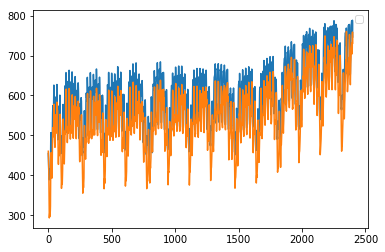

In [30]:
#Policy 3: Flexibility with Max Storage Time
#Current implementation is greedy and ignores certain cases of when you should not minimize at one point

time = 10
olduse = list(use)

for i in range(0,len(use) - time):
    flag = True
    sec = -1
    for j in range(i, i + time):
        if(use[j] < use[i] and (sec == -1 or use[j] > use[sec])):
            sec = j

    if(sec == -1):
        continue
    
    sec = use[sec]
    left = use[i] - sec
    while(flag):
        flag = False
        for j in range(i, i + time):
            if(use[j] < sec):
                flag = True
                upd = j
                break
        if(flag == False):
            break
        
        nleft = left
        nleft -= min((sec - use[j]),left)
        use[i] -= min((sec - use[j]),left)
        use[j] = min(use[j] + left, sec)
        
        left = nleft
        if(left == 0):
            break
    
    if(left > 0):
        tot = 0
        for j in range(i,i+time):
            tot += use[j]
        for j in range(i, i + time):
            use[j] = tot / time

for i in range(0,len(use)):
    full[i] -= olduse[i]
    full[i] += use[i]
    
disp()  

                

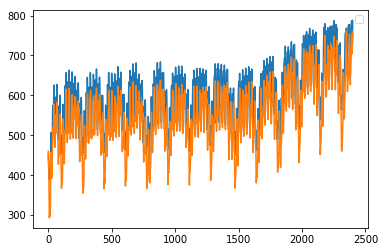

In [31]:
#Policy 4: Flexibility with Max Capacity

capacity = 3

olduse = list(use)

i = 0
while((i + 24) < len(use)):
    for j in range(0, capacity * 10):
        mini = -1
        maxi = -1
        for k in range(i, i + 24):
            if(mini == -1 or use[k] < use[mini]):
                mini = k
            if(maxi == -1 or use[k] > use[maxi]):
                maxi = k
        use[mini] += 0.1
        use[maxi] -= 0.1
    i += 24
    
for i in range(0,len(use)):
    full[i] -= olduse[i]
    full[i] += use[i]
       

disp()  

OUTPUT DATA